# 识别猫

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset

**加载数据**

lr_utils：一个加载资料包里面的数据的简单功能的库

**输出参数解释如下**

train_set_x_orig ：保存的是训练集里面的图像数据 ( 本训练集有209张64x64的图像 )

train_set_y_orig ：保存的是训练集的图像对应的分类值  ( [0 | 1] , 0表示不是猫，1表示是猫 )

test_set_x_orig ：保存的是测试集里面的图像数据 ( 本训练集有50张64x64的图像 )

test_set_y_orig ： 保存的是测试集的图像对应的分类值 ( [0 | 1] , 0表示不是猫，1表示是猫) 

classes ： 保存的是以bytes类型保存的两个字符串数据，数据为：[b’non-cat’ b’cat’]

In [2]:
# 加载数据

train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset()

train_set_y = [[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]


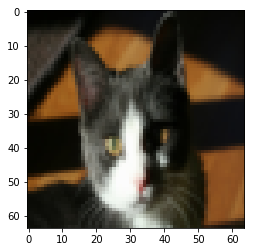

In [3]:
# 随机加载一张图片观察，如：训练集中第19张

index = 19
plt.imshow(train_set_x_orig[index])

# 观察训练集所有标签
print("train_set_y = " + str(train_set_y_orig))

**注：**plt.show显示的是plt绘制的图像，而plt.imshow显示的是调用出的二进制矩阵的图像

In [6]:
# 打印出当前的训练标签值
# 使用 np.squeeze的目的是压缩维度，【未压缩】train_set_y[:,index]的值为[1] , 【压缩后】np.squeeze(train_set_y[:,index])的值为1
# print("【使用np.squeeze：" + str(np.squeeze(train_set_y[:,index])) + "，不使用np.squeeze： " + str(train_set_y[:,index]) + "】")
# 只有压缩后的值才能进行解码操作

print("y = " + str(train_set_y_orig[:, index]) + ", it is a " + classes[np.squeeze(train_set_y_orig[:, index])].decode("utf-8") + " picture")

y = [1], it is a cat picture


**参数解释**

m_train ：训练集里图片的数量

m_test ：测试集里图片的数量

num_px ： 训练、测试集里面的图片的宽度和高度(均为64x64)

In [4]:
m = train_set_y_orig.shape

px = train_set_x_orig.shape

m, px

((1, 209), (209, 64, 64, 3))

In [5]:
test_set_x_orig.shape, test_set_y_orig.shape

((50, 64, 64, 3), (1, 50))

In [6]:
#读取训练集，测试集数量
m_train = train_set_y_orig.shape[1]
m_test = test_set_y_orig.shape[1]

#读取训练集图片大小，为 64x64
num_px = train_set_x_orig[1]

为了方便，把维度为 (64, 64, 3) 的numpy数组重新构造为 (64 x 64 x 3, 1) 的数组，而每个像素点由( R, G, B)三原色构成的。从而，训练和测试数据集是一个numpy数组，每列代表一个平坦的图像，应该有m_train和m_test列。

In [ ]:
# 降维，变平处理
# X = np.random.randn(3,3,3)

# Xflatten = X.reshape(-1,X.shape [0])
# Xflatten = X.reshape(X.shape [0], -1).T

In [7]:
# 对训练集、测试集降维

train_set_x_flatten = train_set_x_orig.reshape(-1, train_set_x_orig.shape[0])
test_set_x_flatten = test_set_x_orig.reshape(-1, test_set_x_orig.shape[0])

In [8]:
train_set_x_flatten.shape, test_set_x_flatten.shape

((12288, 209), (12288, 50))

**预处理**

对数据进行标准化，为了处理方便，使像素直接除以255，因为RGB中[0, 255] 不存在比255大的像素值，故可以直接除以255，使像素值在 [0, 1] 之间

In [9]:
train_set_x_flatten = train_set_x_flatten / 255
test_set_x_flatten = test_set_x_flatten / 255

**构建神经网络**

正向传播
$$\text z^{(i)}=w^Tx^{(i)}+b$$ $$\textŷ^{(i)}=a^{(i)}=sigmoid(z^{(i)})$$ $$\text L(a^{(i)}, y^{(i)})=-(y log(a^{(i)})+(1-y^{(i)}) log(1-y^{(i)})$$

反向传播
$$\text dZ^{[i]}=A^{[i]}-Y$$ $$\text dw^{[i]}=\frac{1}{m} dZ^{[i]}A^{[i-1]T}$$ $$\text db=\frac{1}{m} np.sum(dZ^{[i]}, axis=1, keepdims=True)$$

通过对所有训练样例求和来计算成本：$$\text J=\frac{1}{m} \sum\limits_{i=0}^{m}L(a^{(i)}, y^{(i)})$$

建立神经网络的主要步骤是：

1. 定义模型结构（例如输入特征的数量）
2. 初始化模型的参数
3. 循环：计算当前损失（正向传播）、计算当前梯度（反向传播）、更新参数（梯度下降）

构建sigmoid函数

In [10]:
def sigmoid(z):
    
    """
            参数：
                        z：任何大小的标量或numpy数组

            返回：
                        g：sigmoid(z)
    """
    
    g = 1 / (1 + np.exp(-z))
    
    return g

In [28]:
g = sigmoid(0)
g

0.5

初始化w和b

In [11]:
def initialize(dim):
    
    """
            构建一个维度为(dim, 1)的0向量，初始化b
            
            参数：
                        dim：想要的矢量大小
                        
            返回：
                        w：大小为(dim, 1)的初始化向量
                        b：初始化标量
     """
    
    w = np.zeros(shape=(dim, 1))
    b = 0
    
    # 用断言保证数据是正确的，b是float或int型
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

**前向传播 和 返向传播**

In [12]:
def propagate(w, b, X, Y):
    
    """
            该函数实现前向传播和和反向传播
            
            参数：
                    w,b：参数，上述初始化后参数
                    X：矩阵类型为（num_px * num_px * 3，训练数量）
                    Y：真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据数量)
                    
            输出：
                    cost：逻辑回归的损失函数
                    dw：相对于w的损失梯度，与w相同的形状
                    db：相对于b的损失梯度，与b的形状相同
    """
    
    m = X.shape[1]
    
    # 正向传播
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    
    # 反向传播
    dZ = A - Y
    dw = (1 / m) * np.dot(X, dZ.T)
    db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
    
    # 是用断言保证数据是正确的
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost  = np.squeeze(cost)
    assert(cost.shape == ())
    
    # 创建一个字典，保存 dw,db
    grads = {
        "dw": dw,
        "db": db
    }
    
    return (grads, cost)

In [13]:
#测试一下propagate
print("测试propagate")
#初始化一些参数
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

测试propagate
dw = [[0.99993216]
 [1.99980262]]
db = [[0.49993523]]
cost = 6.000064773192205


**梯度下降**

通过最小化成本函数 J 来学习 w 和 b 。对于参数 θ，更新规则是 $ \theta = \theta - \alpha \text{ } d\theta$，其中 α 是学习率

In [20]:
def optimize(w, b, X, Y, iters, learning_rate, print_cost = False):
    
    """
                函数通过运行梯度下降算法来优化w和b
    
                参数：
                        w ：权重，大小不等的数组（num_px * num_px * 3，1）
                        b ： 偏差，一个标量
                        X ： 维度为（num_px * num_px * 3，训练数据的数量）的数组。
                        Y  ：真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据的数量)
                        iters ：优化循环的迭代次数
                        learning_rate ：梯度下降更新规则的学习率
                        print_cost ：每100步打印一次损失值

                返回：
                        params ：包含权重w和偏差b的字典
                        grads ：包含权重和偏差相对于成本函数的梯度的字典
                        成本 ：优化期间计算的所有成本列表，将用于绘制学习曲线

                提示：
                        两个步骤并遍历：
                            1）计算当前参数的成本和梯度，使用propagate()
                            2）使用w和b的梯度下降法则更新参数
    """
    
    costs = []
    
    for i in range(iters):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # 记录成本
        if i % 100 == 0:
            costs.append(cost)
            
        # 打印成本数据
        if (print_cost) and (i % 100 == 0):
            print("迭代次数：%i, 误差：%f " %(i, cost))
            
        params  = {
                "w" : w,
                "b" : b }
        grads = {
            "dw": dw,
            "db": db } 
    
    return (params, grads, costs)

In [15]:
#测试optimize
print("测试optimize")
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
params, grads, costs = optimize(w , b , X , Y , iters=100 , learning_rate = 0.009 , print_cost = False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

测试optimize
w = [[0.1124579 ]
 [0.23106775]]
b = [[1.55930492]]
dw = [[0.90158428]
 [1.76250842]]
db = [[0.43046207]]


**实现预测函数prediction**

步骤：

1. 计算$$\text \ \hat{Y}=A=\sigma(w^TX+b)$$
2. 将a的值变为0（如果激活值<= 0.5）或者为1(如果激活值> 0.5), 然后将预测值存储在向量Y_pre中

In [16]:
def prediction(w, b, X):
    
    """
            该函数实现对图片内容预测，使用学习逻辑回归参数logistic （w，b）预测标签是 y=1/0(是猫/不是)
            
            参数：
                    w：
                    b：
                    X：
                    
            输出：
                    Y_pre：输出结果 1/0 的一个numpy数组（向量）
    """
    
    # 图片数量
    m = X.shape[1]
    Y_pre = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # 预测猫出现的概率，即 y=1 的概率
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        # 实现 a->y，即 a[0, i] -> y[0, i] , Y的大小为 (1, m)，故为 [0, i]
        Y_pre[0, i] = 1 if A[0, i] > 0.5 else 0
        
    assert(Y_pre.shape == (1,m))
    
    return Y_pre

In [15]:
# 测试 prediction
print("测试predict")
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
print("predictions = " + str(prediction(w, b, X)))

测试predict
predictions = [[1. 1.]]


**模型**

In [17]:
def model(X_train, Y_train, X_test, Y_test, iters, learning_rate, print_cost):
    
    """
            通过调用之前实现的函数来构建逻辑回归模型
    
            参数：
                    X_train：numpy的数组,维度为（num_px * num_px * 3，m_train）的训练集
                    Y_train：numpy的数组,维度为（1，m_train）（矢量）的训练标签集
                    X_test：numpy的数组,维度为（num_px * num_px * 3，m_test）的测试集
                    Y_test：numpy的数组,维度为（1，m_test）的（向量）的测试标签集
                    iters：表示用于优化参数的迭代次数的超参数
                    learning_rate：表示optimize（）更新规则中使用的学习速率的超参数
                    print_cost：设置为true以每100次迭代打印成本

            返回：
                    d：包含有关模型信息的字典
    
    """
    
    w, b = initialize(X_train.shape[0])
    
    params, grads, costs = optimize(w, b, X_train, Y_train, iters, learning_rate, print_cost)
    
    w, b = params["w"], params["b"]
    
    Y_pre_train = prediction(w, b, X_train)
    Y_pre_test = prediction(w, b, X_test)
    
    print("训练集准确性：", format(100 - np.mean(np.abs(Y_pre_train - Y_train)) * 100) ,"%")
    print("测试集准确性：", format(100 - np.mean(np.abs(Y_pre_test - Y_test)) * 100) ,"%")

    d = {
            "costs" : costs,
            "Y_prediction_test" : Y_pre_test,
            "Y_prediciton_train" : Y_pre_train,
            "w" : w,
            "b" : b,
            "learning_rate" : learning_rate,
            "num_iterations" : iters }
    
    return d

In [21]:
print("====================测试model====================")     
#加载真实的数据
d = model(train_set_x_flatten, train_set_y_orig, test_set_x_flatten, test_set_y_orig, iters = 2000, learning_rate = 0.005, print_cost = True)

====================测试model====================
迭代次数：0, 误差：0.693147 
迭代次数：100, 误差：0.709726 
迭代次数：200, 误差：0.657712 
迭代次数：300, 误差：0.614611 
迭代次数：400, 误差：0.578001 
迭代次数：500, 误差：0.546372 
迭代次数：600, 误差：0.518331 
迭代次数：700, 误差：0.492852 
迭代次数：800, 误差：0.469259 
迭代次数：900, 误差：0.447139 
迭代次数：1000, 误差：0.426262 
迭代次数：1100, 误差：0.406617 
迭代次数：1200, 误差：0.388723 
迭代次数：1300, 误差：0.374678 
迭代次数：1400, 误差：0.365826 
迭代次数：1500, 误差：0.358532 
迭代次数：1600, 误差：0.351612 
迭代次数：1700, 误差：0.345012 
迭代次数：1800, 误差：0.338704 
迭代次数：1900, 误差：0.332664 
训练集准确性： 91.38755980861244 %
测试集准确性： 34.0 %


**绘图**

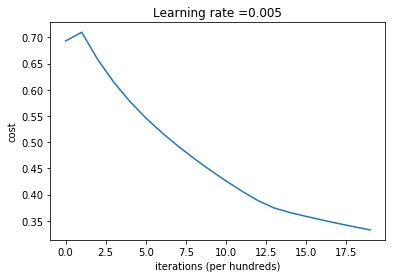

In [22]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**不同学习率的影响**

learning rate is: 0.01
训练集准确性： 71.29186602870814 %
测试集准确性： 64.0 %

-------------------------------------------------------

learning rate is: 0.001
训练集准确性： 74.16267942583733 %
测试集准确性： 34.0 %

-------------------------------------------------------

learning rate is: 0.0001
训练集准确性： 66.02870813397129 %
测试集准确性： 34.0 %

-------------------------------------------------------



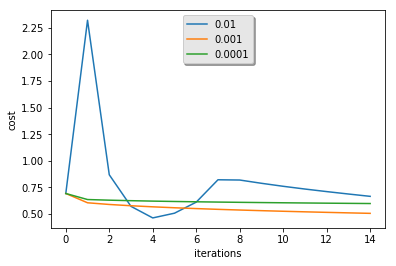

In [23]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x_flatten, train_set_y_orig, test_set_x_flatten, test_set_y_orig, iters = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()